 =============================================================
  ##               TRABAJO FINAL INTEGRADOR       
  
  ###                  ANALISIS DE DATOS
  ###                 CRIMENES DE CHICAGO
 =============================================================


**ALUMNOS:**
- Mauro Fabian Barquinero
- Martin Errazquin
---

Importar librerias

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Carga de datos

In [433]:
#  Cargar el dataset
file_path = "C:\CEIA\Analisis_de_datos\Trabajo Final\Crimes_-_2024_20250315.csv"
df = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2174163630.py:2: SyntaxWarning: invalid escape sequence '\C'
  file_path = "C:\CEIA\Analisis_de_datos\Trabajo Final\Crimes_-_2024_20250315.csv"


# Análisis de la Estructura del Dataset

In [434]:
# Se explora la estructura del dataset
print("\n🔹 Primeras filas del dataset")
df.head()


🔹 Primeras filas del dataset


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43.0,14,1186817.0,1860189.0,2024,01/08/2025 03:42:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38.0,26,1179661.0,1873623.0,2024,01/08/2025 03:42:09 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70.0,04B,1145740.0,1853048.0,2024,01/08/2025 03:42:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42.0,14,1184362.0,1861188.0,2024,01/08/2025 03:42:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25.0,08B,1137458.0,1907694.0,2024,01/08/2025 03:42:09 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


In [435]:
print("\n🔹 Informacion general del dataset")
df.info()


🔹 Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257668 entries, 0 to 257667
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    257668 non-null  int64  
 1   Case Number           257668 non-null  object 
 2   Date                  257668 non-null  object 
 3   Block                 257668 non-null  object 
 4   IUCR                  257668 non-null  object 
 5   Primary Type          257668 non-null  object 
 6   Description           257668 non-null  object 
 7   Location Description  256659 non-null  object 
 8   Arrest                257668 non-null  bool   
 9   Domestic              257668 non-null  bool   
 10  Beat                  257668 non-null  int64  
 11  District              257668 non-null  int64  
 12  Ward                  257668 non-null  int64  
 13  Community Area        257666 non-null  float64
 14  FBI Code         

In [436]:
print("\n 🔹 Cantidad de filas y columnas", df.shape)


 🔹 Cantidad de filas y columnas (257668, 22)


In [437]:
print("\n🔹 Nombres de las columnas en el dataset:")
df.columns


🔹 Nombres de las columnas en el dataset:


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
# Se listan los distritos en orden
distritos_unicos = df["District"].dropna().unique()
distritos_df = pd.DataFrame({"Distrito": sorted(distritos_unicos)})
print("\n Distritos: ")
distritos_df


 Distritos: 


,Distrito
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# Limpieza de Datos

In [ ]:
## Lista de columnas que no son útiles para el análisis
'''
ID: Es solo un identificador único, no aporta información útil
Case Number: Es solo un número de referencia para la policía
Block: Muestra direcciones parcialmente censuradas; no permite un análisis geoespacial preciso.
IUCR: Un código numérico que solo sirve como referencia interna.
FBI Code: Solo clasifica crímenes según el sistema del FBI, pero no es útil para tendencias
'''
columnas_a_eliminar = ["ID", "Case Number", "Block", "IUCR", "FBI Code"] 
df = df.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print("\n🔹 Columnas después de la eliminación:", df.columns)
print(df.head())

print("\n🔹 Valores nulos en cada columna:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print("\n✅ Duplicados eliminados.")

# Rellenar valores nulos con espacios en blanco
df.fillna(" ", inplace=True)
print("\n✅Los valores nulos se reemplazaron satisfactoriamente")

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()
print("\n✅ La normalizacion de columnas ha sido satisfactoria.")

Columnas después de la eliminación: Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')
                     Date       Primary Type  \
0  12/31/2024 11:58:00 PM    CRIMINAL DAMAGE   
1  12/31/2024 11:56:00 PM  CRIMINAL TRESPASS   
2  12/31/2024 11:55:00 PM            BATTERY   
3  12/31/2024 11:53:00 PM    CRIMINAL DAMAGE   
4  12/31/2024 11:50:00 PM            BATTERY   

                                         Description Location Description  \
0                                        TO PROPERTY            APARTMENT   
1                                       TO RESIDENCE            APARTMENT   
2  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...        HOTEL / MOTEL   
3                                         TO VEHICLE               STREET   
4                

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\195739840.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(" ", inplace=True)


# Analisis Estadistico Descriptivo

In [440]:
# Tendencia central
print("\n🔹 Media (valor promedio)")
media =df.mean(numeric_only=True)
print(media)

print("\n🔹 Mediana (Valor central)")
mediana =df.median(numeric_only=True)
print(mediana)


🔹 Media (valor promedio)
arrest         0.136823
domestic       0.184152
beat        1156.838371
district      11.338484
ward          23.182057
year        2024.000000
dtype: float64

🔹 Mediana (Valor central)
arrest         0.0
domestic       0.0
beat        1034.0
district      10.0
ward          23.0
year        2024.0
dtype: float64



🔹 Moda (Valor mas frencuente)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2971471791.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


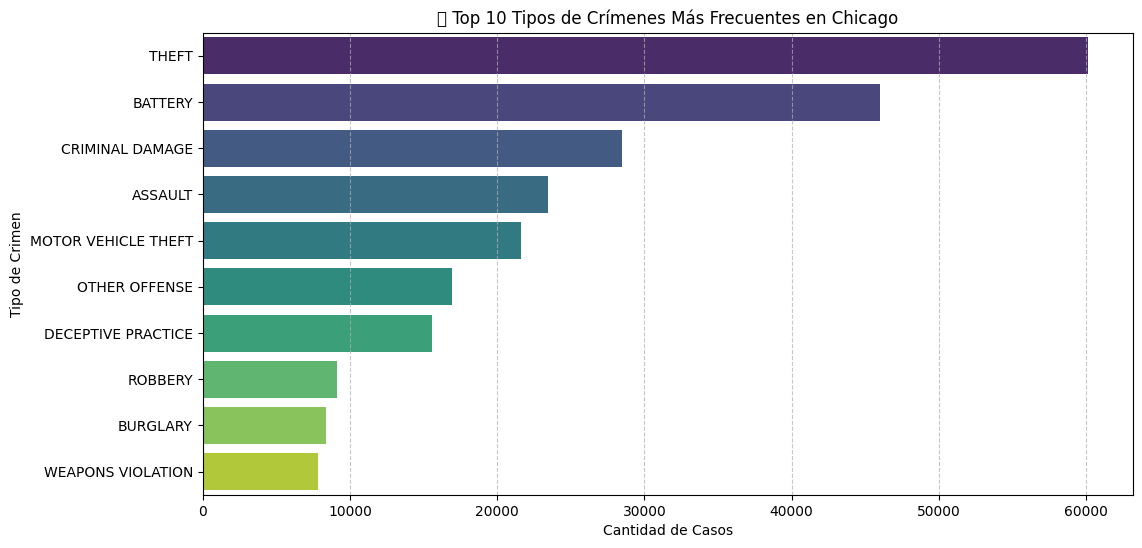


 El delito mas frecuente:  THEFT


In [ ]:
#======================================
# Moda - Top 10 crímenes más comunes
#======================================
print("\n🔹 Moda (Valor mas frencuente)")

# Análisis de Moda: Tipo de Crimen más frecuente
tipo_crimen_mas_frecuente = df["primary type"].mode()[0]

# Contar la frecuencia de cada tipo de crimen
conteo_tipos_crimen = df["primary type"].value_counts().head(10)  # Top 10 crímenes más comunes

# Gráfico de Barras: Delitos más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")

plt.title("Top 10 Tipos de Crímenes Más Frecuentes en Chicago")
plt.xlabel("Cantidad de Casos")
plt.ylabel("Tipo de Crimen")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostrar el delito más frecuente
print("\n El delito mas frecuente: ", tipo_crimen_mas_frecuente)

In [ ]:
# 1.1 Dispersion
print("\n🔹 Varianza (Dispesion respecto a la media)")
varianza = df.var(numeric_only=True)
print(varianza)

print("\n🔹 Desviacion Estandar")
desviacion_estandar = df.std(numeric_only=True)
print(desviacion_estandar)


🔹 Varianza (Dispesion respecto a la media)
arrest           0.118103
domestic         0.150241
beat        502871.901781
district        50.211062
ward           194.477038
year             0.000000
dtype: float64

 Desviacion Estandar (Dispersion resoecti a ka nedua en mismas unidades)
arrest        0.343661
domestic      0.387609
beat        709.134615
district      7.085976
ward         13.945502
year          0.000000
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\114366471.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")


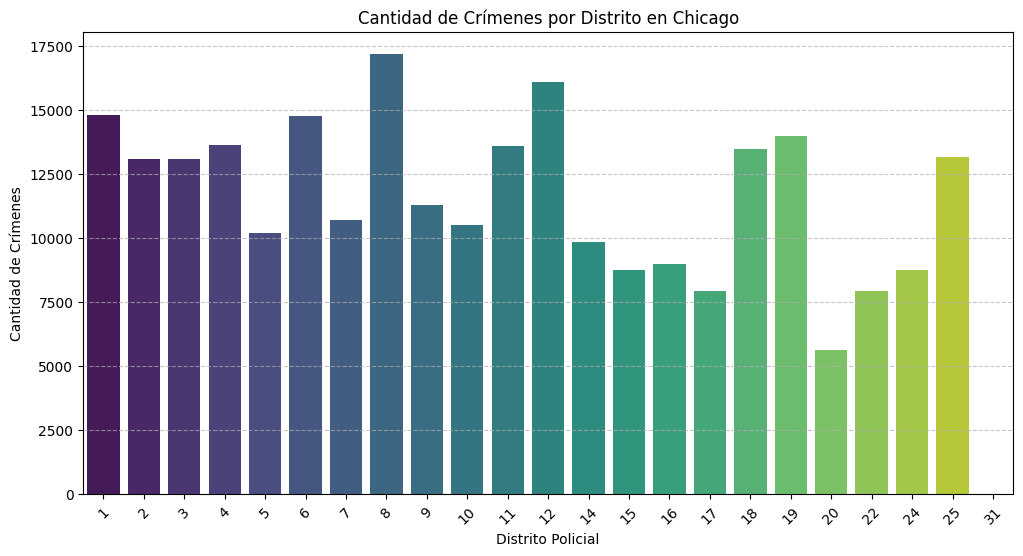

In [ ]:
# ========================================
# Cantidad total de crímenes por distrito
#=========================================
crimenes_por_distrito = df["district"].value_counts().sort_values(ascending=False)

# Gráfico de Barras: Distritos con Más Crímenes
plt.figure(figsize=(12, 6))
sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")

# Personalizar el gráfico
plt.title("Cantidad de Crímenes por Distrito en Chicago")
plt.xlabel("Distrito Policial")
plt.ylabel("Cantidad de Crímenes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

## 1. ¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?¿Se observan anomalías y/o patrones estacionales?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\3086206419.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors='coerce')


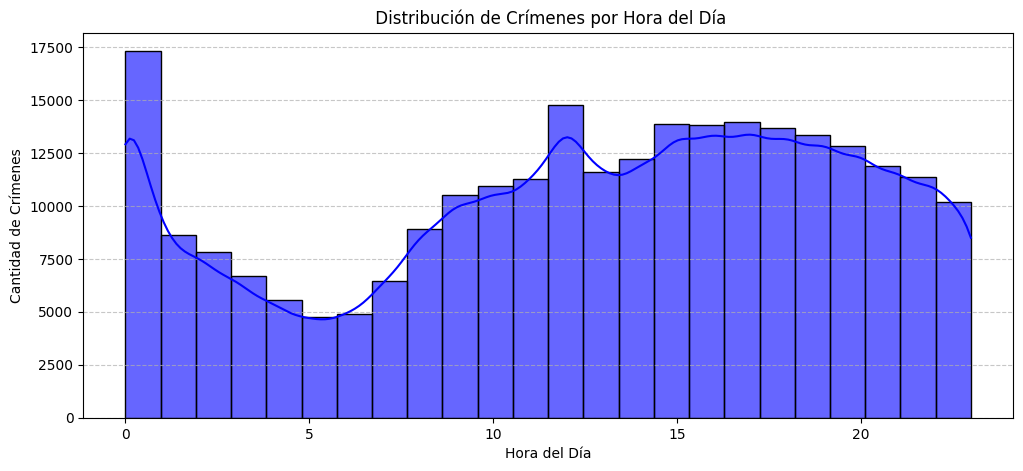

In [ ]:
# Se convierte la fecha en formato datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Extraer información temporal para el análisis
df["Hora"] = df["date"].dt.hour  # Extraer la hora del crimen
df["Día de la Semana"] = df["date"].dt.day_name()  # Extraer el día de la semana
df["Mes"] = df["date"].dt.month  # Extraer el mes

# ======================================================
#  Gráfico 1: Distribución de Crímenes por Hora del Día
# ======================================================
plt.figure(figsize=(12, 5))
sns.histplot(df["Hora"], bins=24, kde=True, color="blue", alpha=0.6)
plt.title(" Distribución de Crímenes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Crímenes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



###  Variación de Crímenes por Hora del Día
Pico de crímenes ocurre a las 00:00 horas (medianoche).
Hay un aumento de crímenes en las noches, lo que sugiere que el crimen es más frecuente en horarios nocturnos.
Madrugada y mañana tienen menos crímenes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\1992688734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Día de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")


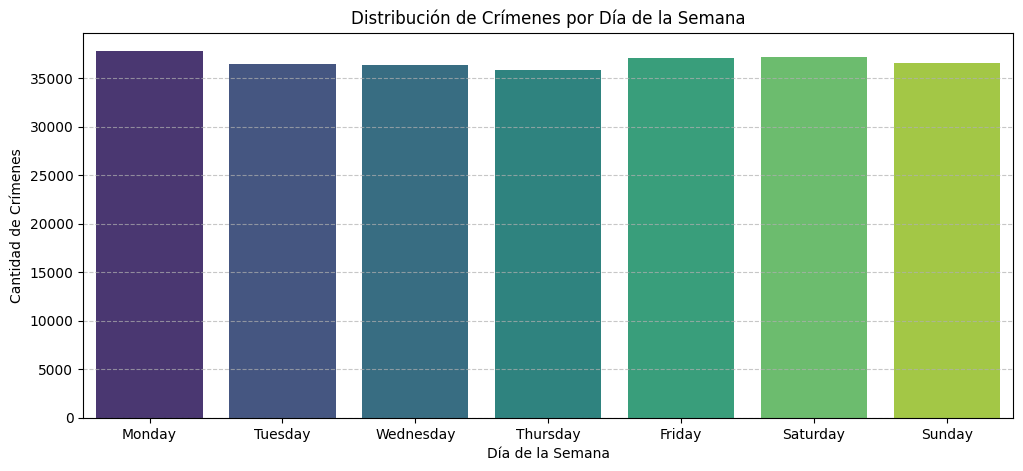

In [ ]:
# ==========================================================
#  Gráfico 2: Distribución de Crímenes por Día de la Semana
# ==========================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Día de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Distribución de Crímenes por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad de Crímenes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variación de Crímenes por Día de la Semana
- El lunes es el día con más crímenes reportados.
- Fines de semana (sábado y domingo) no muestran un aumento significativo, lo que contradice la creencia de que los crímenes aumentan esos días.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2384464036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Mes"], palette="magma")


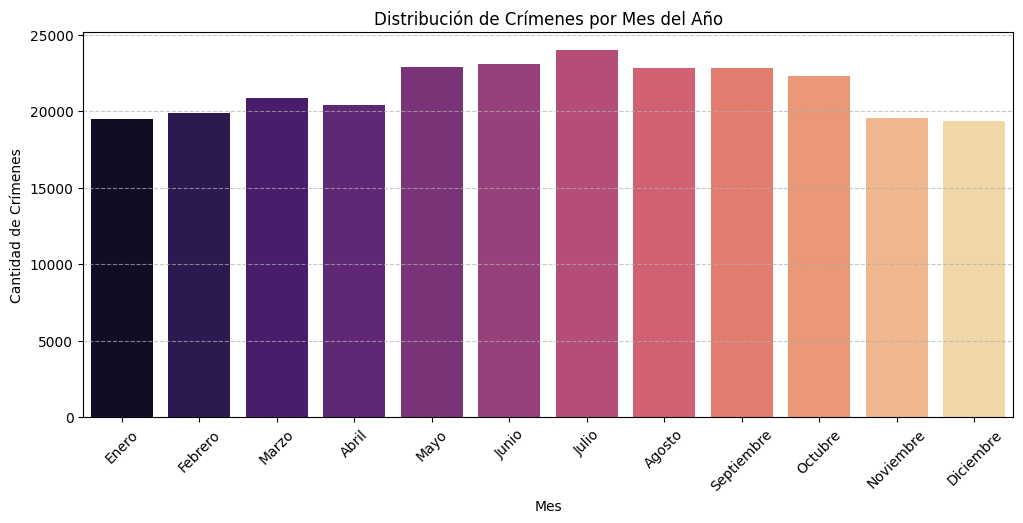

In [ ]:
# ====================================================
# Gráfico 3: Distribución de Crímenes por Mes del Año
# ====================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Mes"], palette="magma")
plt.title("Distribución de Crímenes por Mes del Año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Crímenes")
plt.xticks(range(0, 12), ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variación de Crímenes por Mes del Año
- Julio es el mes con más crímenes reportados.
- Se observa un aumento de crímenes en verano (junio-julio-agosto), lo que puede estar relacionado con el aumento de actividades al aire libre y mayor movilidad de las personas.

In [ ]:
# ==================================================================================================================
# Análisis de Anomalías y Patrones Estacionales
# Se proceden a calcular la Moda, Media, Mediana, Percentiles y Desviacion Estandar para la hora, dia y mes del año
# ==================================================================================================================
hora_pico = df["Hora"].mode()[0]  # Hora con más crímenes
media_hora = df["Hora"].mean()
mediana_hora = df["Hora"].median()
percentiles_hora = df["Hora"].quantile([0.25, 0.50, 0.75])
std_hora = df["Hora"].std()

# Media y Mediana de los crímenes por día de la semana (convirtiendo a números)
dias_semana_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Dia_Num"] = df["Día de la Semana"].apply(lambda x: dias_semana_ordenados.index(x) if x in dias_semana_ordenados else None)

dia_pico = df["Día de la Semana"].mode()[0]  # Día con más crímenes
media_dia = df["Dia_Num"].mean()
mediana_dia = df["Dia_Num"].median()
percentiles_dia = df["Dia_Num"].quantile([0.25, 0.50, 0.75])
std_dia = df["Dia_Num"].std()

mes_pico = df["Mes"].mode()[0]  # Mes con más crímenes
media_mes = df["Mes"].mean()
mediana_mes = df["Mes"].median()
percentiles_mes = df["Mes"].quantile([0.25, 0.50, 0.75])
std_mes = df["Mes"].std()

# Convertir el número del día y mes a su nombre correspondiente
nombre_mediana_dia = dias_semana_ordenados[int(mediana_dia)]
nombre_mediana_mes = calendar.month_name[int(mediana_mes)]
# Obtener el nombre del mes
nombre_mes_pico = calendar.month_name[mes_pico]

print("\n--=== Análisis de Anomalías y Patrones Estacionales ===--\n")

# Análisis por Hora
print("** Distribución de Crímenes por Hora del Día **")
print(f"Hora con más crímenes (Moda): {hora_pico}:00 hrs")
print(f"Hora promedio de crímenes (Media): {media_hora:.2f} hrs")
print(f"Hora central de crímenes (Mediana): {mediana_hora:.2f} hrs")
print(f"Desviación estándar: {std_hora:.2f} hrs")
print(f"Percentiles: 25%={percentiles_hora[0.25]:.2f}, 50%={percentiles_hora[0.50]:.2f}, 75%={percentiles_hora[0.75]:.2f}\n")

# Análisis por Día de la Semana
print("** Distribución de Crímenes por Día de la Semana **")
print(f"Día con más crímenes (Moda): {dia_pico}")
print(f"Día promedio de crímenes (Media): {dias_semana_ordenados[int(media_dia)]}")
print(f"Día central de crímenes (Mediana): {nombre_mediana_dia}")
print(f"Desviación estándar: {std_dia:.2f} días")
print(f"Percentiles: 25%={dias_semana_ordenados[int(percentiles_dia[0.25])]}, 50%={dias_semana_ordenados[int(percentiles_dia[0.50])]}, 75%={dias_semana_ordenados[int(percentiles_dia[0.75])]}\n")

# Análisis por Mes
print("**Distribución de Crímenes por Mes del Año **")
print(f"Mes con más crímenes (Moda): {nombre_mes_pico}")
print(f"Mes promedio de crímenes (Media): {calendar.month_name[int(media_mes)]}")
print(f"Mes central de crímenes (Mediana): {nombre_mediana_mes}")
print(f"Desviación estándar: {std_mes:.2f} meses")
print(f"Percentiles: 25%={calendar.month_name[int(percentiles_mes[0.25])]}, 50%={calendar.month_name[int(percentiles_mes[0.50])]}, 75%={calendar.month_name[int(percentiles_mes[0.75])]}")


--=== Análisis de Anomalías y Patrones Estacionales ===--

** Distribución de Crímenes por Hora del Día **
Hora con más crímenes (Moda): 0:00 hrs
Hora promedio de crímenes (Media): 12.52 hrs
Hora central de crímenes (Mediana): 13.00 hrs
Desviación estándar: 6.85 hrs
Percentiles: 25%=8.00, 50%=13.00, 75%=18.00

** Distribución de Crímenes por Día de la Semana **
Día con más crímenes (Moda): Monday
Día promedio de crímenes (Media): Wednesday
Día central de crímenes (Mediana): Thursday
Desviación estándar: 2.01 días
Percentiles: 25%=Tuesday, 50%=Thursday, 75%=Saturday

* *Distribución de Crímenes por Mes del Año **
Mes con más crímenes (Moda): July
Mes promedio de crímenes (Media): June
Mes central de crímenes (Mediana): July
Desviación estándar: 3.35 meses
Percentiles: 25%=April, 50%=July, 75%=September


#  Análisis de Anomalías y Patrones Estacionales

## 🕒 Distribución de Crímenes por Hora del Día
- **Moda:** `00:00 hrs` → Hora con más crímenes.
- **Media:** `12:52 hrs` → Promedio de la hora del crimen.
- **Mediana:** `13:00 hrs` → Hora central del crimen.
- **Desviación estándar:** `6.85 hrs` → Los crímenes están bastante dispersos a lo largo del día.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes de las `08:00 hrs`.
  - 🔹 **50%** ocurren antes de las `13:00 hrs` (**Mediana**).
  - 🔹 **75%** ocurren antes de las `18:00 hrs`.

✔️ **Conclusión:** Aunque el **pico** es a medianoche, la mayor concentración de crímenes ocurre entre **mediodía y las 6 PM**.

---

## 🗓 Distribución de Crímenes por Día de la Semana
- **Moda:** `Monday (Lunes)` → Día con más crímenes.
- **Media:** `Wednesday (Miércoles)` → Promedio del día con crímenes.
- **Mediana:** `Thursday (Jueves)` → Día central en la distribución.
- **Desviación estándar:** `2.01 días` → Los crímenes están distribuidos de manera amplia en la semana.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes del `martes`.
  - 🔹 **50%** ocurren antes del `jueves` (**Mediana**).
  - 🔹 **75%** ocurren antes del `sábado`.

✔️ **Conclusión:** Aunque los **lunes** tienen más crímenes, la actividad criminal se mantiene **estable durante toda la semana**, con un **pequeño pico en jueves**.

---

## 📅 Distribución de Crímenes por Mes del Año
- **Moda:** `July (Julio)` → Mes con más crímenes.
- **Media:** `June (Junio)` → Promedio de los crímenes por mes.
- **Mediana:** `July (Julio)` → Mes central en la distribución.
- **Desviación estándar:** `3.35 meses` → Los crímenes están distribuidos a lo largo del año, pero con una **tendencia fuerte en verano**.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes de `abril`.
  - 🔹 **50%** ocurren antes de `julio` (**Mediana**).
  - 🔹 **75%** ocurren antes de `septiembre`.

✔️ **Conclusión:** **Los crímenes aumentan en verano, con julio como el mes más crítico**, pero hay una **distribución gradual durante el año**.